https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/

In [ ]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnistm as mnist_dataset


In [16]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

We normalize each pixel by dividing by 255, 
which scales values from [0,255] down to [0,1]

In [2]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


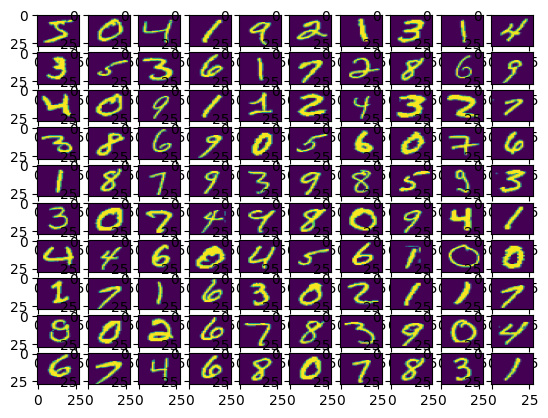

In [3]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()


Build a Sequential neural network model. The model consists of:
- Flatten Layer:
    Reshapes 2D input (28×28 pixels) into a 1D array of 784 elements
- Dense Layers: 
    fully connected layer with 256, using the ReLU activation function
    fully connected layer with 128 neurons, using the ReLU activation function
- Output Layer: 
    The final layer with 10 neurons, representing the 10 classes of digits (0-9) with Sigmoid activation

In [5]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),  
    Dense(128, activation='sigmoid'), 
    Dense(10, activation='softmax'),  
])

/opt/anaconda3/envs/apple_ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile model by specifying:
- Optimizer: 
    Adam – for efficient weight updates
- Loss Function: 
    Sparse categorical crossentropy – is suitable for multi-class classification
- Metrics: 
    Accuracy – to evaluate model performance

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


During the model training use 20% of the training data for validation to monitor the model’s performance on unseen data during training.

In [10]:
# Train the model
history = model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=2000, 
          validation_split=0.2)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9238 - loss: 0.2782 - val_accuracy: 0.9283 - val_loss: 0.2596
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9243 - loss: 0.2684 - val_accuracy: 0.9302 - val_loss: 0.2481
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9284 - loss: 0.2536 - val_accuracy: 0.9333 - val_loss: 0.2383
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9302 - loss: 0.2457 - val_accuracy: 0.9354 - val_loss: 0.2286
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9328 - loss: 0.2353 - val_accuracy: 0.9383 - val_loss: 0.2203
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9357 - loss: 0.2225 - val_accuracy: 0.9399 - val_loss: 0.2127
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9380 - loss: 0.2153 - val_accuracy: 0.9414 - val_loss: 0.2052
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9409 - loss: 0.2048 - val_accuracy: 0.9426 - v

Below evaluation of the model should show the accuracy of the model 92% on the test samples.

In [11]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)


Test loss, Test accuracy: [0.18753264844417572, 0.9451000094413757]


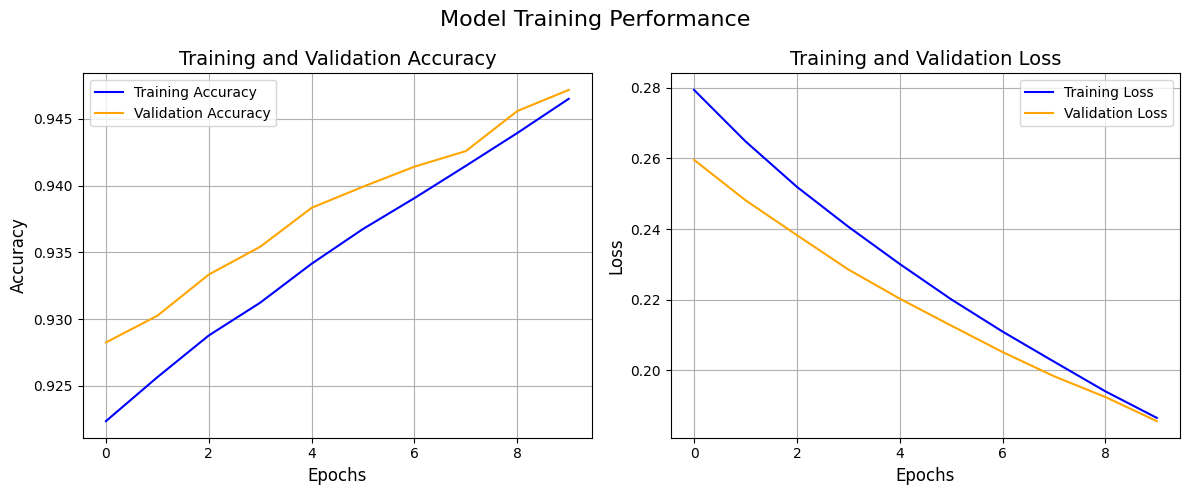

In [12]:
# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()
